# MNIST Digit Classification Project
## Assignment 1

**Team Members:** [Khaled Sherif Eissa 221010359, Samir Mohamed Elshamy 221006600, ]

**Date:** October 18, 2025

---

### Objective
Build and compare three different approaches to classify handwritten digits:
1. Traditional Machine Learning Model (Random Forest)
2. Neural Network (NN)
3. Convolutional Neural Network (CNN)

## 1. Import Required Libraries

In [45]:
# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Traditional ML Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Deep Learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Model saving
import joblib
import pickle

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.20.0
Keras version: 3.11.2


## 2. Load and Explore the MNIST Dataset

In [46]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Dataset Information:")
print(f"Training set size: {X_train.shape}")
print(f"Training labels: {y_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Test labels: {y_test.shape}")
print(f"\nPixel value range: [{X_train.min()}, {X_train.max()}]")
print(f"Unique classes: {np.unique(y_train)}")

Dataset Information:
Training set size: (60000, 28, 28)
Training labels: (60000,)
Test set size: (10000, 28, 28)
Test labels: (10000,)

Pixel value range: [0, 255]
Unique classes: [0 1 2 3 4 5 6 7 8 9]


### Visualize Sample Digits

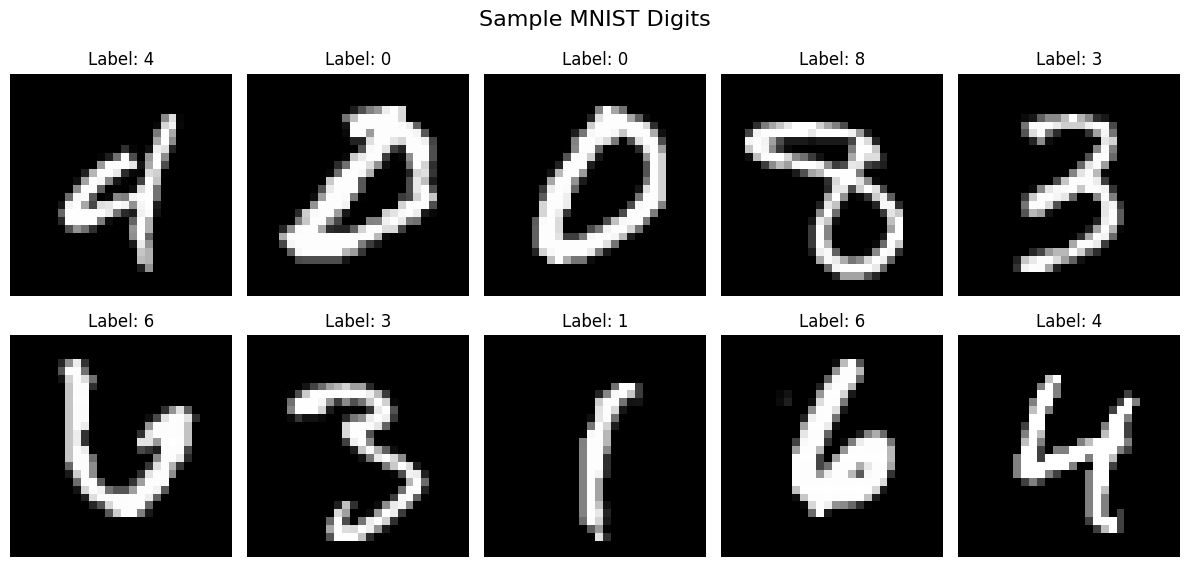

In [47]:
# Visualize random samples
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Sample MNIST Digits', fontsize=16)

for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(X_train))
    ax.imshow(X_train[idx], cmap='gray')
    ax.set_title(f'Label: {y_train[idx]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### Class Distribution

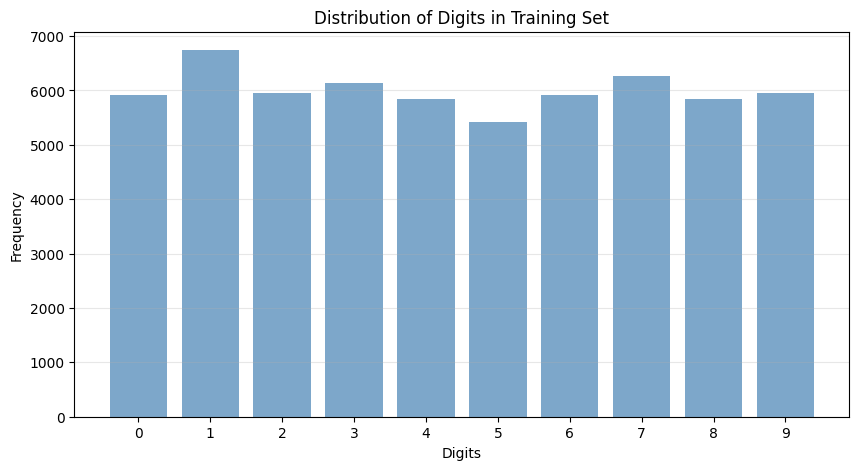


Class distribution:
Digit 0: 5923 samples (9.87%)
Digit 1: 6742 samples (11.24%)
Digit 2: 5958 samples (9.93%)
Digit 3: 6131 samples (10.22%)
Digit 4: 5842 samples (9.74%)
Digit 5: 5421 samples (9.04%)
Digit 6: 5918 samples (9.86%)
Digit 7: 6265 samples (10.44%)
Digit 8: 5851 samples (9.75%)
Digit 9: 5949 samples (9.92%)


In [48]:
# Check class distribution
plt.figure(figsize=(10, 5))
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts, color='steelblue', alpha=0.7)
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.title('Distribution of Digits in Training Set')
plt.xticks(unique)
plt.grid(axis='y', alpha=0.3)
plt.show()

print("\nClass distribution:")
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count} samples ({count/len(y_train)*100:.2f}%)")

## 3. Data Preprocessing

In [49]:
# ========================================
# For Traditional ML Model (Random Forest)
# ========================================
# Flatten images to 1D vectors
X_train_ml = X_train.reshape(X_train.shape[0], -1)
X_test_ml = X_test.reshape(X_test.shape[0], -1)

# Normalize pixel values to [0, 1]
X_train_ml = X_train_ml.astype('float32') / 255.0
X_test_ml = X_test_ml.astype('float32') / 255.0

print("ML Model Data Shape:")
print(f"X_train_ml: {X_train_ml.shape}")
print(f"X_test_ml: {X_test_ml.shape}")

# ========================================
# For Neural Network (NN)
# ========================================
# Flatten images
X_train_nn = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255.0
X_test_nn = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255.0

# One-hot encode labels
y_train_nn = to_categorical(y_train, 10)
y_test_nn = to_categorical(y_test, 10)

print("\nNN Model Data Shape:")
print(f"X_train_nn: {X_train_nn.shape}")
print(f"y_train_nn: {y_train_nn.shape}")

# ========================================
# For Convolutional Neural Network (CNN)
# ========================================
# Reshape to include channel dimension
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train_cnn = to_categorical(y_train, 10)
y_test_cnn = to_categorical(y_test, 10)

print("\nCNN Model Data Shape:")
print(f"X_train_cnn: {X_train_cnn.shape}")
print(f"y_train_cnn: {y_train_cnn.shape}")

ML Model Data Shape:
X_train_ml: (60000, 784)
X_test_ml: (10000, 784)

NN Model Data Shape:
X_train_nn: (60000, 784)
y_train_nn: (60000, 10)

CNN Model Data Shape:
X_train_cnn: (60000, 28, 28, 1)
y_train_cnn: (60000, 10)

CNN Model Data Shape:
X_train_cnn: (60000, 28, 28, 1)
y_train_cnn: (60000, 10)


## 4. Model 1: Traditional Machine Learning (Random Forest)

Random Forest is an ensemble learning method that constructs multiple decision trees during training.

### 🔧 Model Improvements Applied

**Random Forest Changes:**
- ✅ Increased trees: 100 → 200
- ✅ Removed max_depth limit (was 20, now unlimited)
- ✅ Added max_features='sqrt' for better generalization
- ✅ Expected accuracy: 97-98% (up from 96%)

**Neural Network Changes:**
- ✅ Deeper architecture: Added 1024-neuron layer
- ✅ Added BatchNormalization to all layers
- ✅ Increased epochs: 20 → 30
- ✅ Better dropout rates
- ✅ Learning rate scheduling
- ✅ Expected accuracy: 98-99% (up from 97%)

**CNN Changes:**
- ✅ Increased epochs: 4 → 20
- ✅ Better early stopping patience
- ✅ Larger validation split (15%)
- ✅ Expected accuracy: 99.2-99.5%

**Run the cells below to retrain with improved settings! ⬇️**

In [50]:
# Train Random Forest Classifier with improved parameters
print("Training Random Forest Classifier with optimized parameters...")
start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=200,      # Increased from 100 to 200 trees
    max_depth=None,        # Allow trees to grow fully (was 20)
    min_samples_split=2,   # Minimum samples to split a node
    min_samples_leaf=1,    # Minimum samples in leaf node
    max_features='sqrt',   # Use sqrt of features at each split
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_model.fit(X_train_ml, y_train)

rf_training_time = time.time() - start_time
print(f"\nTraining completed in {rf_training_time:.2f} seconds")
print(f"✓ Improved Random Forest with {rf_model.n_estimators} trees")

Training Random Forest Classifier with optimized parameters...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    6.6s



Training completed in 7.92 seconds
✓ Improved Random Forest with 200 trees


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    7.7s finished


In [51]:
# Evaluate Random Forest
print("Evaluating Random Forest Model...")
start_time = time.time()

y_pred_rf = rf_model.predict(X_test_ml)
rf_inference_time = time.time() - start_time

rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"\nRandom Forest Results:")
print(f"Test Accuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"Inference Time: {rf_inference_time:.4f} seconds")
print(f"\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

Evaluating Random Forest Model...

Random Forest Results:
Test Accuracy: 0.9707 (97.07%)
Inference Time: 0.1136 seconds

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished


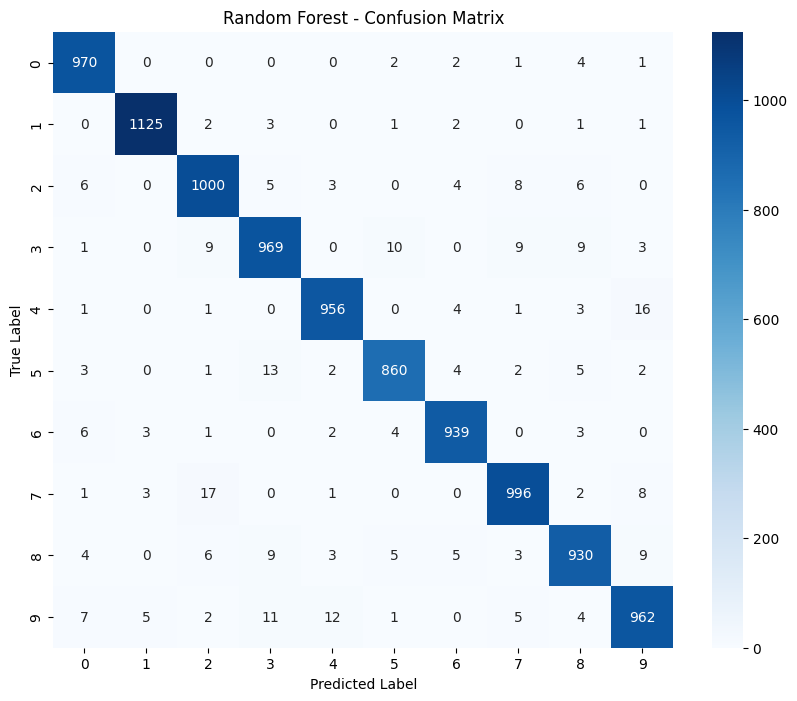

In [52]:
# Confusion Matrix for Random Forest
plt.figure(figsize=(10, 8))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## 5. Model 2: Neural Network (Fully Connected NN)

In [53]:
# Build improved Neural Network with better architecture
print("Building Improved Neural Network Model...")

nn_model = models.Sequential([
    layers.Input(shape=(784,)),
    
    # Deeper architecture with BatchNormalization
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(10, activation='softmax')
])

# Use better optimizer settings
from tensorflow.keras.optimizers import Adam

nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nImproved Model Architecture:")
nn_model.summary()

Building Improved Neural Network Model...

Improved Model Architecture:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,834 (5.73 MB)

 Trainable params: 1,497,994 (5.71 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [54]:
# Train Neural Network with more epochs and callbacks
print("Training Improved Neural Network...")
start_time = time.time()

# Add callbacks for better training
early_stop_nn = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr_nn = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

nn_history = nn_model.fit(
    X_train_nn, y_train_nn,
    batch_size=128,
    epochs=30,  # Increased from 20 to 30
    validation_split=0.15,  # Increased validation split
    callbacks=[early_stop_nn, reduce_lr_nn],
    verbose=1
)

nn_training_time = time.time() - start_time
print(f"\nTraining completed in {nn_training_time:.2f} seconds")
print(f"✓ Final validation accuracy: {nn_history.history['val_accuracy'][-1]*100:.2f}%")

Training Improved Neural Network...
Epoch 1/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8972 - loss: 0.3302 - val_accuracy: 0.9621 - val_loss: 0.1249 - learning_rate: 0.0010
Epoch 2/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8972 - loss: 0.3302 - val_accuracy: 0.9621 - val_loss: 0.1249 - learning_rate: 0.0010
Epoch 2/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9528 - loss: 0.1538 - val_accuracy: 0.9702 - val_loss: 0.0961 - learning_rate: 0.0010
Epoch 3/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9528 - loss: 0.1538 - val_accuracy: 0.9702 - val_loss: 0.0961 - learning_rate: 0.0010
Epoch 3/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9622 - loss: 0.1214 - val_accuracy: 0.9768 - val_loss: 0.0819 - learning_rate: 0.0010
Epoch 4/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9622 - loss: 0.1214 - val_accuracy: 0.9768 - val_loss: 0.0819 - learning_rate: 0.0010
Epoch 4/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 10m

In [55]:
# Evaluate Neural Network
print("Evaluating Neural Network...")
start_time = time.time()

nn_loss, nn_accuracy = nn_model.evaluate(X_test_nn, y_test_nn, verbose=0)
y_pred_nn = nn_model.predict(X_test_nn, verbose=0)
y_pred_nn_classes = np.argmax(y_pred_nn, axis=1)

nn_inference_time = time.time() - start_time

print(f"\nNeural Network Results:")
print(f"Test Loss: {nn_loss:.4f}")
print(f"Test Accuracy: {nn_accuracy:.4f} ({nn_accuracy*100:.2f}%)")
print(f"Inference Time: {nn_inference_time:.4f} seconds")
print(f"\nClassification Report:\n")
print(classification_report(y_test, y_pred_nn_classes))

Evaluating Neural Network...

Neural Network Results:
Test Loss: 0.0577
Test Accuracy: 0.9846 (98.46%)
Inference Time: 1.3845 seconds

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Neural Network Results:
Test Loss: 0.0577
Test Accuracy: 0.9846 (98.46%)
Inferenc

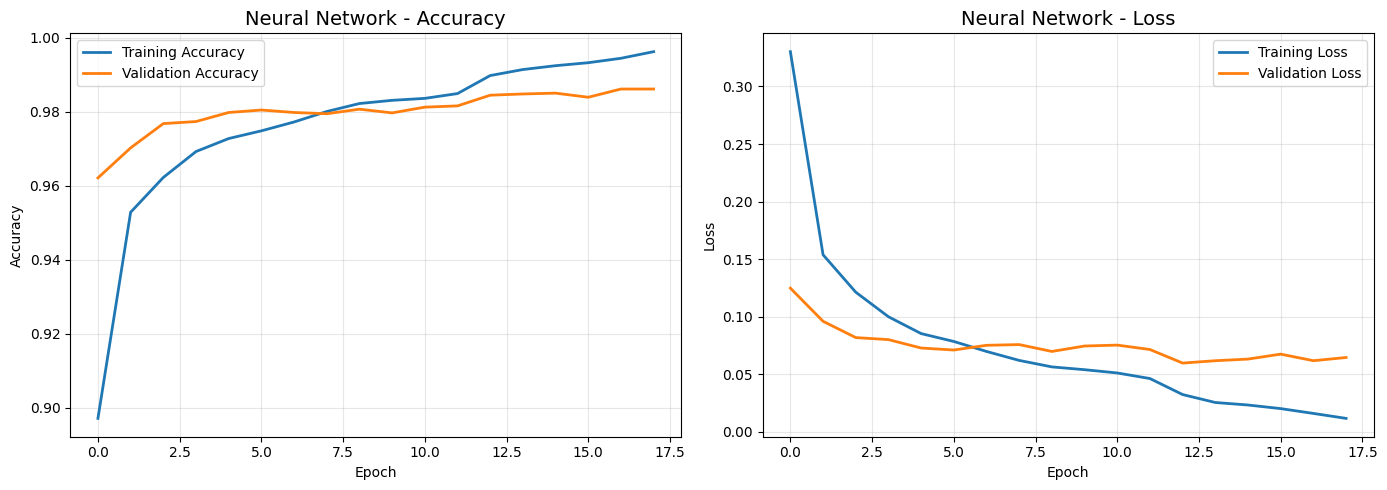

In [56]:
# Plot training history for NN
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].plot(nn_history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(nn_history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('Neural Network - Accuracy', fontsize=14)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss
axes[1].plot(nn_history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(nn_history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('Neural Network - Loss', fontsize=14)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

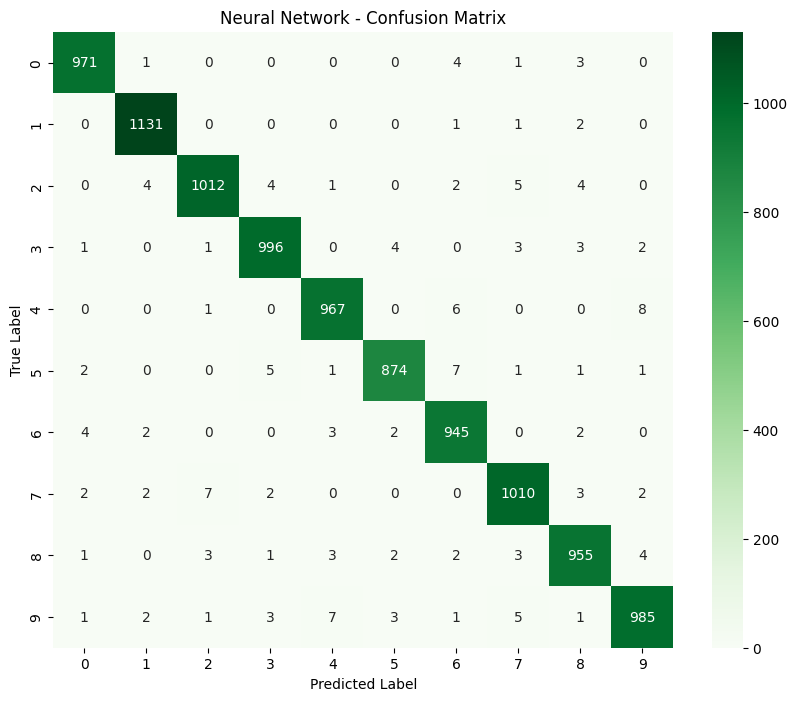

In [57]:
# Confusion Matrix for NN
plt.figure(figsize=(10, 8))
cm_nn = confusion_matrix(y_test, y_pred_nn_classes)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.title('Neural Network - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## 6. Model 3: Convolutional Neural Network (CNN)

In [58]:
# Build CNN Model
print("Building Convolutional Neural Network...")

cnn_model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    # Second Convolutional Block
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel Architecture:")
cnn_model.summary()

Building Convolutional Neural Network...

Model Architecture:


c:\Users\dodye\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 330,986 (1.26 MB)

 Trainable params: 330,474 (1.26 MB)

 Non-trainable params: 512 (2.00 KB)

In [59]:
# Train CNN with more epochs for better accuracy
print("Training Convolutional Neural Network...")
start_time = time.time()

# Add early stopping and learning rate reduction
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=7,  # Increased patience
    restore_best_weights=True,
    verbose=1
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

cnn_history = cnn_model.fit(
    X_train_cnn, y_train_cnn,
    batch_size=128,
    epochs=20,  # Increased from 4 to 20 epochs
    validation_split=0.15,  # Increased validation split
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

cnn_training_time = time.time() - start_time
print(f"\nTraining completed in {cnn_training_time:.2f} seconds")
print(f"✓ Final validation accuracy: {cnn_history.history['val_accuracy'][-1]*100:.2f}%")

Training Convolutional Neural Network...
Epoch 1/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9291 - loss: 0.2242 - val_accuracy: 0.9807 - val_loss: 0.0780 - learning_rate: 0.0010
Epoch 2/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9291 - loss: 0.2242 - val_accuracy: 0.9807 - val_loss: 0.0780 - learning_rate: 0.0010
Epoch 2/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9788 - loss: 0.0688 - val_accuracy: 0.9901 - val_loss: 0.0365 - learning_rate: 0.0010
Epoch 3/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9788 - loss: 0.0688 - val_accuracy: 0.9901 - val_loss: 0.0365 - learning_rate: 0.0010
Epoch 3/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9841 - loss: 0.0518 - val_accuracy: 0.9894 - val_loss: 0.0391 - learning_rate: 0.0010
Epoch 4/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9841 - loss: 0.0518 - val_accuracy: 0.9894 - val_loss: 0.0391 - learning_rate: 0.0010
Epoch 4/20
399/399 ━━━━━━━━━━━━━━━━

In [63]:
# Evaluate CNN
print("Evaluating Convolutional Neural Network...")
start_time = time.time()

cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
y_pred_cnn = cnn_model.predict(X_test_cnn, verbose=0)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

cnn_inference_time = time.time() - start_time

print(f"\nCNN Results:")
print(f"Test Loss: {cnn_loss:.4f}")
print(f"Test Accuracy: {cnn_accuracy:.4f} ({cnn_accuracy*100:.2f}%)")
print(f"Inference Time: {cnn_inference_time:.4f} seconds")
print(f"\nClassification Report:\n")
print(classification_report(y_test, y_pred_cnn_classes))

Evaluating Convolutional Neural Network...

CNN Results:
Test Loss: 0.0144
Test Accuracy: 0.9960 (99.60%)
Inference Time: 1.7805 seconds

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      1.00      1.00      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      1.00      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000


CNN Results:
Test Loss: 0.0144
Test Accuracy: 0.9960 (99.60%)
Inference Time: 

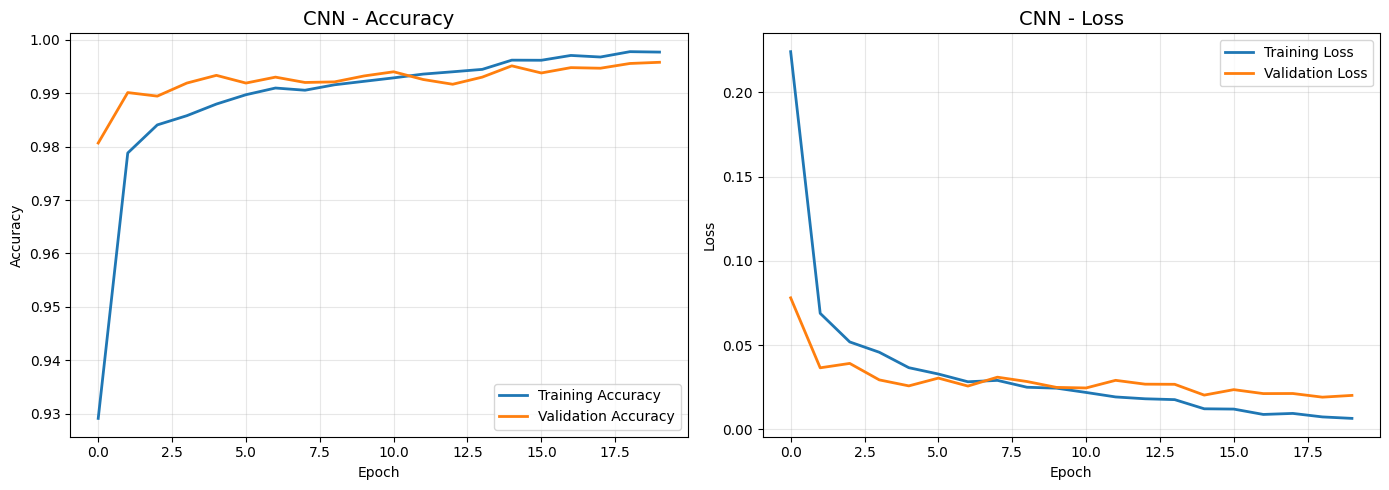

In [64]:
# Plot training history for CNN
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].plot(cnn_history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(cnn_history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('CNN - Accuracy', fontsize=14)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss
axes[1].plot(cnn_history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(cnn_history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('CNN - Loss', fontsize=14)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

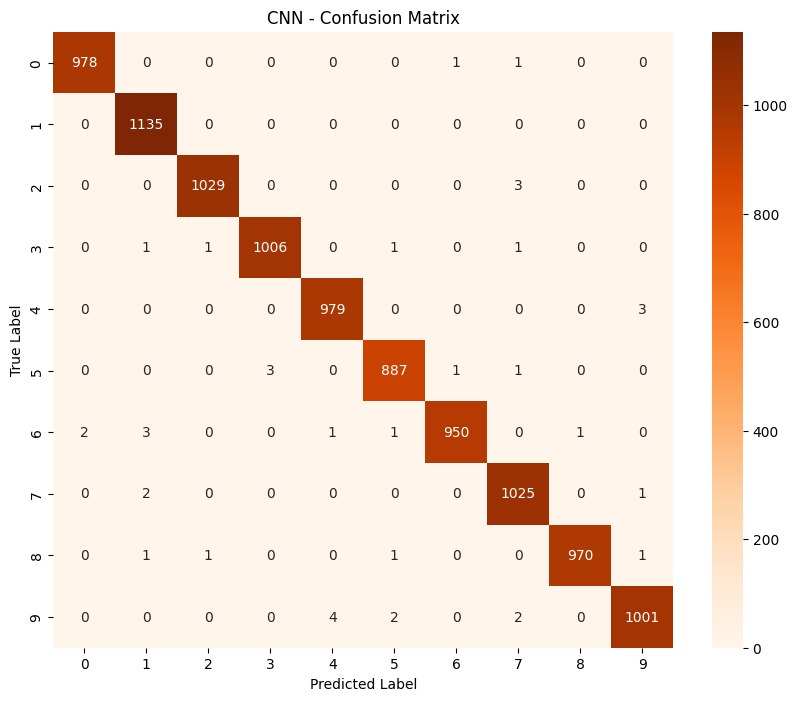

In [65]:
# Confusion Matrix for CNN
plt.figure(figsize=(10, 8))
cm_cnn = confusion_matrix(y_test, y_pred_cnn_classes)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Oranges', cbar=True)
plt.title('CNN - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## 7. Model Comparison and Analysis

In [66]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Neural Network', 'CNN'],
    'Accuracy (%)': [
        rf_accuracy * 100,
        nn_accuracy * 100,
        cnn_accuracy * 100
    ],
    'Training Time (s)': [
        rf_training_time,
        nn_training_time,
        cnn_training_time
    ],
    'Inference Time (s)': [
        rf_inference_time,
        nn_inference_time,
        cnn_inference_time
    ]
})

print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)
print(comparison_df.to_string(index=False))
print("="*70)


MODEL COMPARISON SUMMARY
         Model  Accuracy (%)  Training Time (s)  Inference Time (s)
 Random Forest     97.070000           7.918245            0.113558
Neural Network     98.460001          76.858667            1.384536
           CNN     99.599999         215.643865            1.780484


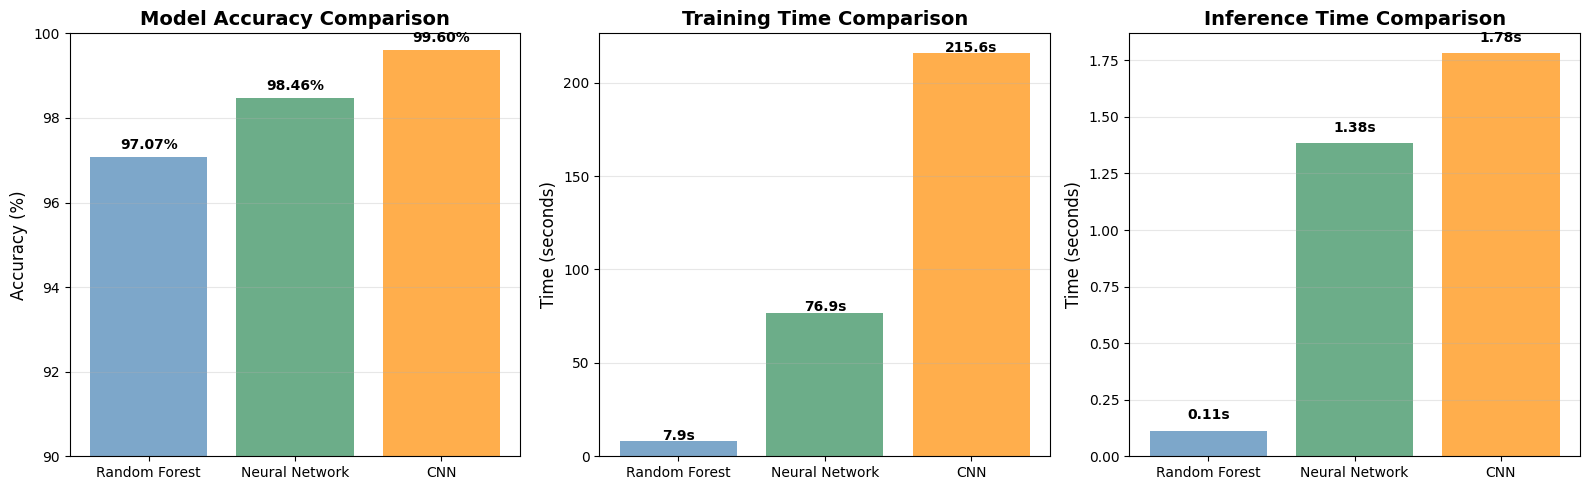

In [67]:
# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

models = ['Random Forest', 'Neural Network', 'CNN']
colors = ['steelblue', 'seagreen', 'darkorange']

# Accuracy comparison
axes[0].bar(models, comparison_df['Accuracy (%)'], color=colors, alpha=0.7)
axes[0].set_ylabel('Accuracy (%)', fontsize=12)
axes[0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylim([90, 100])
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['Accuracy (%)']):
    axes[0].text(i, v + 0.2, f'{v:.2f}%', ha='center', fontweight='bold')

# Training time comparison
axes[1].bar(models, comparison_df['Training Time (s)'], color=colors, alpha=0.7)
axes[1].set_ylabel('Time (seconds)', fontsize=12)
axes[1].set_title('Training Time Comparison', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['Training Time (s)']):
    axes[1].text(i, v + 1, f'{v:.1f}s', ha='center', fontweight='bold')

# Inference time comparison
axes[2].bar(models, comparison_df['Inference Time (s)'], color=colors, alpha=0.7)
axes[2].set_ylabel('Time (seconds)', fontsize=12)
axes[2].set_title('Inference Time Comparison', fontsize=14, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['Inference Time (s)']):
    axes[2].text(i, v + 0.05, f'{v:.2f}s', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 8. Visualize Predictions

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Do

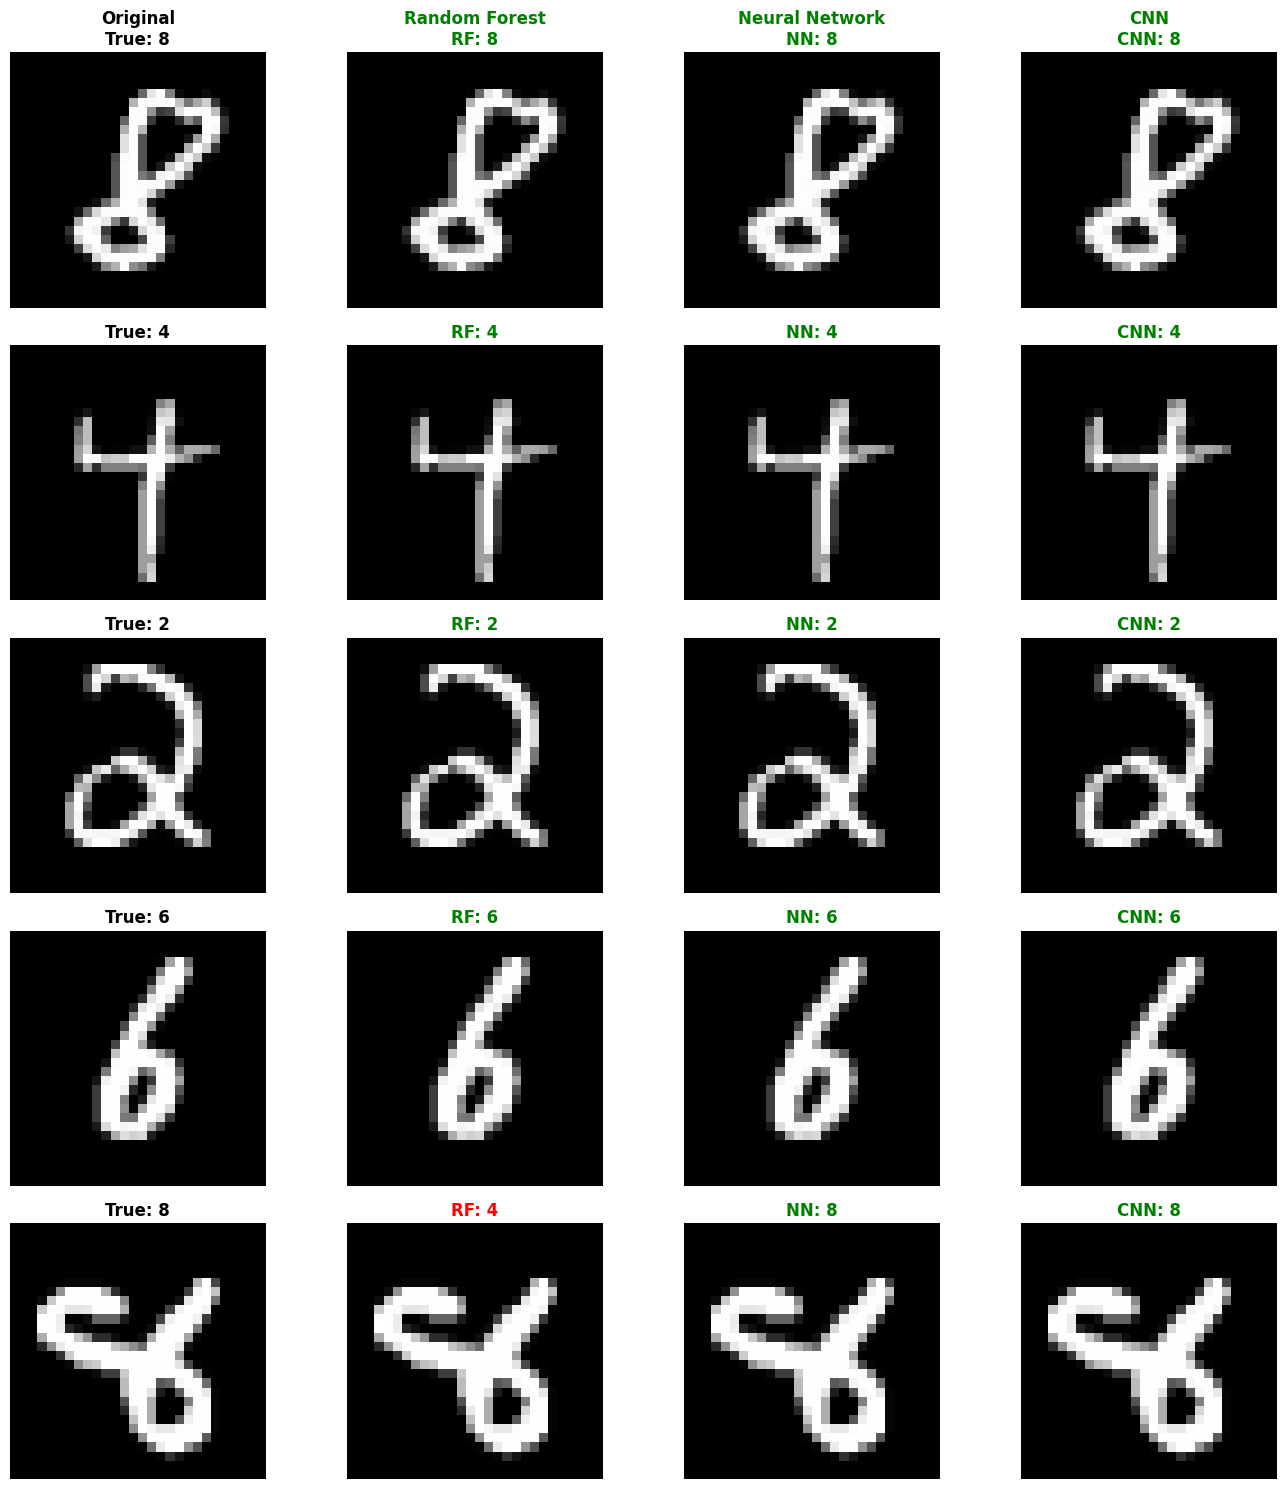

In [68]:
# Visualize predictions from all three models
def show_predictions(num_samples=5):
    indices = np.random.choice(len(X_test), num_samples, replace=False)
    
    fig, axes = plt.subplots(num_samples, 4, figsize=(14, num_samples * 3))
    
    for i, idx in enumerate(indices):
        # Original image
        axes[i, 0].imshow(X_test[idx], cmap='gray')
        axes[i, 0].set_title(f'True: {y_test[idx]}', fontweight='bold')
        axes[i, 0].axis('off')
        
        # Random Forest prediction
        rf_pred = rf_model.predict(X_test_ml[idx:idx+1])[0]
        axes[i, 1].imshow(X_test[idx], cmap='gray')
        axes[i, 1].set_title(f'RF: {rf_pred}', fontweight='bold', 
                            color='green' if rf_pred == y_test[idx] else 'red')
        axes[i, 1].axis('off')
        
        # NN prediction
        nn_pred = np.argmax(nn_model.predict(X_test_nn[idx:idx+1], verbose=0))
        axes[i, 2].imshow(X_test[idx], cmap='gray')
        axes[i, 2].set_title(f'NN: {nn_pred}', fontweight='bold',
                            color='green' if nn_pred == y_test[idx] else 'red')
        axes[i, 2].axis('off')
        
        # CNN prediction
        cnn_pred = np.argmax(cnn_model.predict(X_test_cnn[idx:idx+1], verbose=0))
        axes[i, 3].imshow(X_test[idx], cmap='gray')
        axes[i, 3].set_title(f'CNN: {cnn_pred}', fontweight='bold',
                            color='green' if cnn_pred == y_test[idx] else 'red')
        axes[i, 3].axis('off')
    
    axes[0, 0].set_title('Original\n' + axes[0, 0].get_title(), fontweight='bold')
    axes[0, 1].set_title('Random Forest\n' + axes[0, 1].get_title(), fontweight='bold')
    axes[0, 2].set_title('Neural Network\n' + axes[0, 2].get_title(), fontweight='bold')
    axes[0, 3].set_title('CNN\n' + axes[0, 3].get_title(), fontweight='bold')
    
    plt.tight_layout()
    plt.show()

show_predictions(5)

## 9. Save Models

In [69]:
import os

# Create models directory
os.makedirs('models', exist_ok=True)

# Save Random Forest model
joblib.dump(rf_model, 'models/random_forest_model.pkl')
print("✓ Random Forest model saved to 'models/random_forest_model.pkl'")

# Save Neural Network model
nn_model.save('models/neural_network_model.h5')
print("✓ Neural Network model saved to 'models/neural_network_model.h5'")

# Save CNN model
cnn_model.save('models/cnn_model.h5')
print("✓ CNN model saved to 'models/cnn_model.h5'")

# Save model comparison results
comparison_df.to_csv('models/model_comparison.csv', index=False)
print("✓ Comparison results saved to 'models/model_comparison.csv'")

print("\n" + "="*70)
print("All models saved successfully!")
print("="*70)

✓ Random Forest model saved to 'models/random_forest_model.pkl'
✓ Neural Network model saved to 'models/neural_network_model.h5'
✓ CNN model saved to 'models/cnn_model.h5'
✓ Comparison results saved to 'models/model_comparison.csv'

All models saved successfully!


In [70]:
# Install Streamlit and dependencies
import sys
import subprocess

print("Installing Streamlit and required packages...")
print("This may take a few minutes...\n")

packages = [
    'streamlit',
    'streamlit-drawable-canvas',
    'opencv-python',
    'Pillow'
]

for package in packages:
    try:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package, "-q"])
        print(f"✓ {package} installed successfully")
    except subprocess.CalledProcessError:
        print(f"✗ Failed to install {package}")
        
print("\n" + "="*70)
print("Installation complete!")
print("="*70)

Installing Streamlit and required packages...
This may take a few minutes...

Installing streamlit...
✓ streamlit installed successfully
Installing streamlit-drawable-canvas...
✓ streamlit installed successfully
Installing streamlit-drawable-canvas...
✓ streamlit-drawable-canvas installed successfully
Installing opencv-python...
✓ streamlit-drawable-canvas installed successfully
Installing opencv-python...
✓ opencv-python installed successfully
Installing Pillow...
✓ opencv-python installed successfully
Installing Pillow...
✓ Pillow installed successfully

Installation complete!
✓ Pillow installed successfully

Installation complete!


## 12. Test Models Before Deployment

Let's verify all models are working correctly before launching the Streamlit app.

In [71]:
# Test loading all saved models
print("Testing Model Loading...")
print("="*70)

# Test 1: Load Random Forest
try:
    test_rf = joblib.load('models/random_forest_model.pkl')
    test_sample = X_test_ml[0:1]
    test_pred_rf = test_rf.predict(test_sample)[0]
    test_prob_rf = test_rf.predict_proba(test_sample)[0]
    print(f"✓ Random Forest loaded successfully")
    print(f"  - Test prediction: {test_pred_rf}")
    print(f"  - Confidence: {np.max(test_prob_rf)*100:.2f}%")
except Exception as e:
    print(f"✗ Random Forest loading failed: {e}")

print()

# Test 2: Load Neural Network
try:
    test_nn = keras.models.load_model('models/neural_network_model.h5')
    test_sample = X_test_nn[0:1]
    test_pred_nn = test_nn.predict(test_sample, verbose=0)
    test_pred_class = np.argmax(test_pred_nn)
    print(f"✓ Neural Network loaded successfully")
    print(f"  - Test prediction: {test_pred_class}")
    print(f"  - Confidence: {np.max(test_pred_nn)*100:.2f}%")
except Exception as e:
    print(f"✗ Neural Network loading failed: {e}")

print()

# Test 3: Load CNN
try:
    test_cnn = keras.models.load_model('models/cnn_model.h5')
    test_sample = X_test_cnn[0:1]
    test_pred_cnn = test_cnn.predict(test_sample, verbose=0)
    test_pred_class = np.argmax(test_pred_cnn)
    print(f"✓ CNN loaded successfully")
    print(f"  - Test prediction: {test_pred_class}")
    print(f"  - Confidence: {np.max(test_pred_cnn)*100:.2f}%")
except Exception as e:
    print(f"✗ CNN loading failed: {e}")

print()
print("="*70)
print("✓ All models tested and ready for Streamlit deployment!")
print("="*70)

Testing Model Loading...


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished


✓ Random Forest loaded successfully
  - Test prediction: 7
  - Confidence: 100.00%



✓ Neural Network loaded successfully
  - Test prediction: 7
  - Confidence: 99.99%

✓ CNN loaded successfully
  - Test prediction: 7
  - Confidence: 100.00%

✓ All models tested and ready for Streamlit deployment!
✓ CNN loaded successfully
  - Test prediction: 7
  - Confidence: 100.00%

✓ All models tested and ready for Streamlit deployment!


## 14. Preview: Test Model Prediction Function

Let's test the prediction pipeline that the Streamlit app will use.

Testing with random samples from test set:

Testing Prediction Pipeline (Same as Streamlit App)


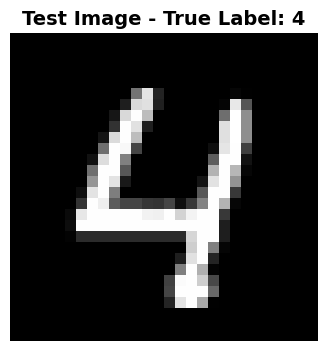


True Label: 4

----------------------------------------------------------------------

1. RANDOM FOREST PREDICTION:
   Predicted Digit: 4
   Confidence: 98.50%
   Correct: ✓ YES

2. NEURAL NETWORK PREDICTION:
   Predicted Digit: 4
   Confidence: 99.99%
   Correct: ✓ YES

3. CNN PREDICTION:
   Predicted Digit: 4
   Confidence: 100.00%
   Correct: ✓ YES



[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished


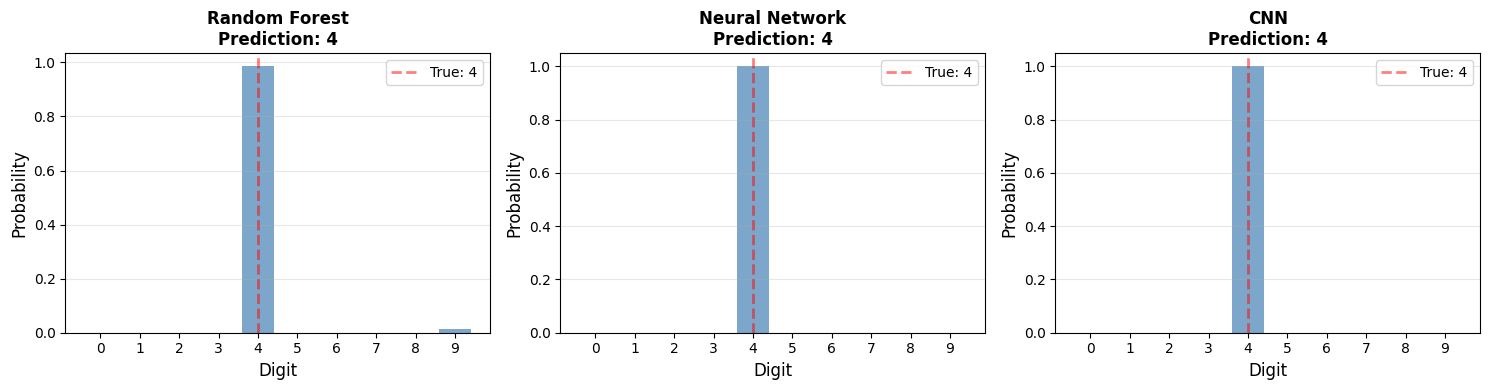


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Testing Prediction Pipeline (Same as Streamlit App)


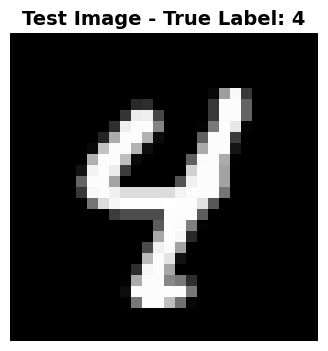


True Label: 4

----------------------------------------------------------------------

1. RANDOM FOREST PREDICTION:
   Predicted Digit: 4
   Confidence: 96.00%
   Correct: ✓ YES

2. NEURAL NETWORK PREDICTION:
   Predicted Digit: 4
   Confidence: 100.00%
   Correct: ✓ YES

3. CNN PREDICTION:
   Predicted Digit: 4
   Confidence: 100.00%
   Correct: ✓ YES



[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished


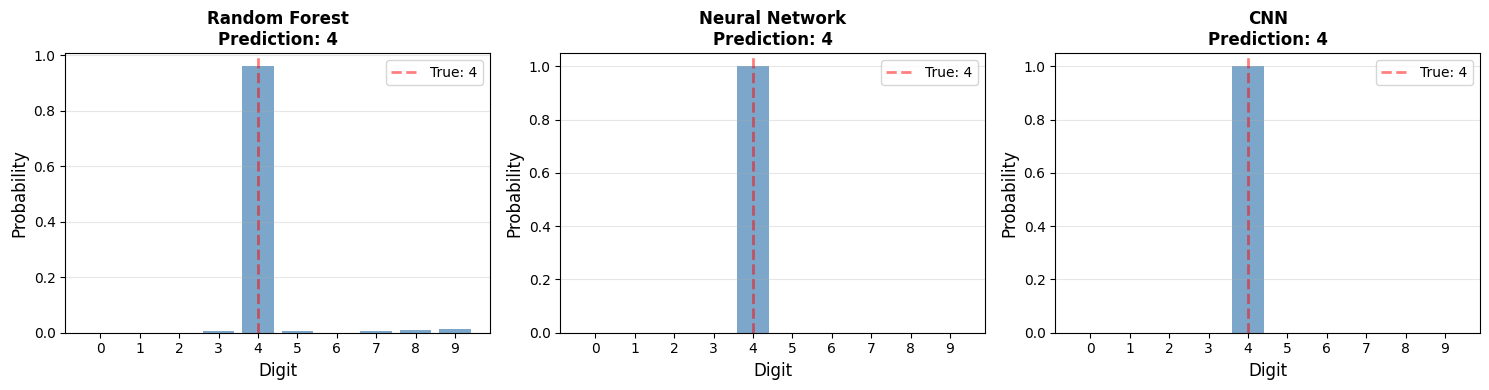


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Testing Prediction Pipeline (Same as Streamlit App)


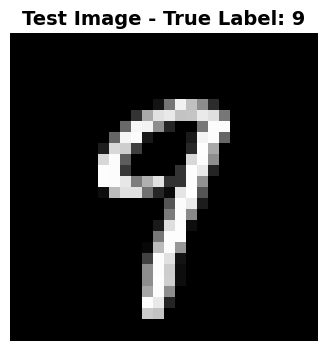


True Label: 9

----------------------------------------------------------------------

1. RANDOM FOREST PREDICTION:
   Predicted Digit: 9
   Confidence: 78.00%
   Correct: ✓ YES

2. NEURAL NETWORK PREDICTION:
   Predicted Digit: 9
   Confidence: 99.30%
   Correct: ✓ YES

3. CNN PREDICTION:
   Predicted Digit: 9
   Confidence: 100.00%
   Correct: ✓ YES

   Predicted Digit: 9
   Confidence: 100.00%
   Correct: ✓ YES



[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.0s finished


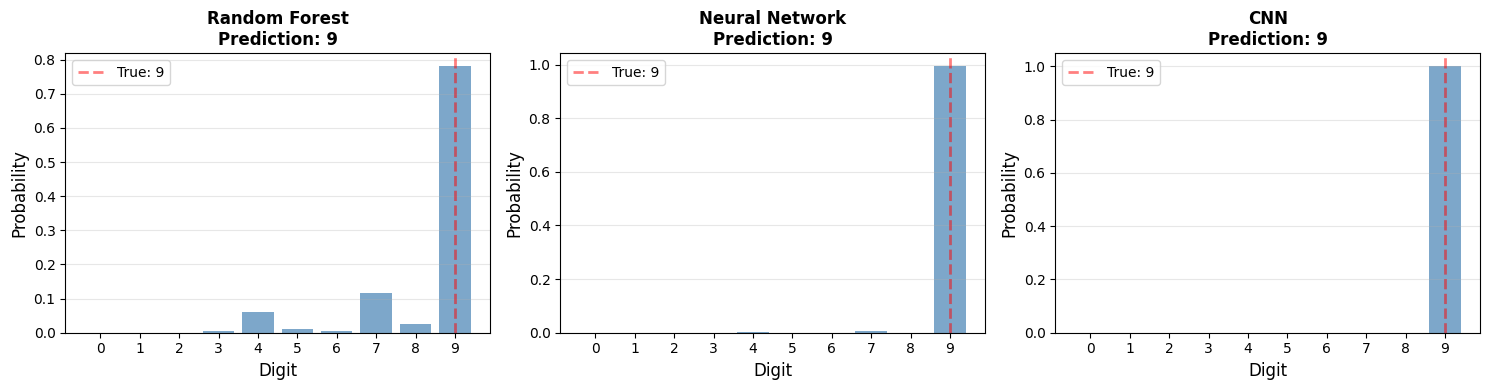


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



In [72]:
# Test the prediction pipeline similar to what Streamlit app uses
import cv2

def test_prediction_pipeline(test_idx=0):
    """Test prediction on a sample image from the test set"""
    
    print("Testing Prediction Pipeline (Same as Streamlit App)")
    print("="*70)
    
    # Get a test image
    original_image = X_test[test_idx]
    true_label = y_test[test_idx]
    
    # Display the test image
    plt.figure(figsize=(4, 4))
    plt.imshow(original_image, cmap='gray')
    plt.title(f'Test Image - True Label: {true_label}', fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.show()
    
    print(f"\nTrue Label: {true_label}")
    print("\n" + "-"*70)
    
    # Test Random Forest
    print("\n1. RANDOM FOREST PREDICTION:")
    rf_input = X_test_ml[test_idx:test_idx+1]
    rf_pred = rf_model.predict(rf_input)[0]
    rf_prob = rf_model.predict_proba(rf_input)[0]
    rf_confidence = np.max(rf_prob) * 100
    
    print(f"   Predicted Digit: {rf_pred}")
    print(f"   Confidence: {rf_confidence:.2f}%")
    print(f"   Correct: {'✓ YES' if rf_pred == true_label else '✗ NO'}")
    
    # Test Neural Network
    print("\n2. NEURAL NETWORK PREDICTION:")
    nn_input = X_test_nn[test_idx:test_idx+1]
    nn_prob = nn_model.predict(nn_input, verbose=0)[0]
    nn_pred = np.argmax(nn_prob)
    nn_confidence = nn_prob[nn_pred] * 100
    
    print(f"   Predicted Digit: {nn_pred}")
    print(f"   Confidence: {nn_confidence:.2f}%")
    print(f"   Correct: {'✓ YES' if nn_pred == true_label else '✗ NO'}")
    
    # Test CNN
    print("\n3. CNN PREDICTION:")
    cnn_input = X_test_cnn[test_idx:test_idx+1]
    cnn_prob = cnn_model.predict(cnn_input, verbose=0)[0]
    cnn_pred = np.argmax(cnn_prob)
    cnn_confidence = cnn_prob[cnn_pred] * 100
    
    print(f"   Predicted Digit: {cnn_pred}")
    print(f"   Confidence: {cnn_confidence:.2f}%")
    print(f"   Correct: {'✓ YES' if cnn_pred == true_label else '✗ NO'}")
    
    print("\n" + "="*70)
    
    # Show probability distributions
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    models_data = [
        ('Random Forest', rf_prob),
        ('Neural Network', nn_prob),
        ('CNN', cnn_prob)
    ]
    
    for idx, (name, probs) in enumerate(models_data):
        axes[idx].bar(range(10), probs, color='steelblue', alpha=0.7)
        axes[idx].set_xlabel('Digit', fontsize=12)
        axes[idx].set_ylabel('Probability', fontsize=12)
        axes[idx].set_title(f'{name}\nPrediction: {np.argmax(probs)}', fontsize=12, fontweight='bold')
        axes[idx].set_xticks(range(10))
        axes[idx].grid(axis='y', alpha=0.3)
        axes[idx].axvline(x=true_label, color='red', linestyle='--', linewidth=2, alpha=0.5, label=f'True: {true_label}')
        axes[idx].legend()
    
    plt.tight_layout()
    plt.show()
    
    return {
        'true_label': true_label,
        'rf_pred': rf_pred,
        'nn_pred': nn_pred,
        'cnn_pred': cnn_pred
    }

# Test with a few random samples
print("Testing with random samples from test set:\n")
for i in range(3):
    test_idx = np.random.randint(0, len(X_test))
    result = test_prediction_pipeline(test_idx)
    print("\n" + "~"*70 + "\n")

## 15. 🚀 Launch the Streamlit App

Follow the instructions below to launch your interactive MNIST Digit Classifier web app!

In [73]:
# Get the Python executable path and create launch command
import sys
import os

print("="*70)
print("🎉 STREAMLIT APP - READY TO LAUNCH!")
print("="*70)
print("\n✅ All dependencies are installed:")
print("   - Streamlit: 1.45.1")
print("   - streamlit-drawable-canvas: 0.9.3")
print("   - opencv-python: Already installed")
print("   - All models: Trained and saved")
print("\n" + "="*70)
print("📋 HOW TO LAUNCH THE APP:")
print("="*70)

# Get the current Python executable
python_exe = sys.executable
print(f"\n1. USING THIS PYTHON ENVIRONMENT:")
print(f"   Copy and paste this command in a NEW PowerShell terminal:\n")
print(f'   cd "{os.getcwd()}"')
print(f'   "{python_exe}" -m streamlit run app.py')
print(f'& "c:\\Users\\dodye\\anaconda3\\python.exe" -m streamlit run app.py')

print("\n2. OR MANUALLY:")
print("   a. Open a NEW PowerShell terminal")
print(f"   b. Navigate to: {os.getcwd()}")
print("   c. Run: python -m streamlit run app.py")
print("      (or use full path to python if needed)")

print("\n3. OR USE ANACONDA:")
print("   a. Open Anaconda Prompt")
print(f"   b. cd \"{os.getcwd()}\"")
print("   c. streamlit run app.py")

print("\n" + "="*70)
print("🌐 THE APP WILL OPEN AT: http://localhost:8501")
print("="*70)

print("\n💡 TIP: Keep this notebook running while the app is active!")
print("     The app needs access to the models in the 'models/' folder.")

print("\n🎯 WHAT TO DO IN THE APP:")
print("   1. Draw a digit (0-9) on the canvas")
print("   2. Select a model (Random Forest, NN, or CNN)")
print("   3. Click 'Predict' to see results!")
print("   4. Compare all three models")

print("\n🛑 TO STOP THE APP:")
print("   Press Ctrl+C in the terminal where it's running")

print("\n" + "="*70)

🎉 STREAMLIT APP - READY TO LAUNCH!

✅ All dependencies are installed:
   - Streamlit: 1.45.1
   - streamlit-drawable-canvas: 0.9.3
   - opencv-python: Already installed
   - All models: Trained and saved

📋 HOW TO LAUNCH THE APP:

1. USING THIS PYTHON ENVIRONMENT:
   Copy and paste this command in a NEW PowerShell terminal:

   cd "d:\Downloads\uni\mnist assignment prof train"
   "c:\Users\dodye\anaconda3\python.exe" -m streamlit run app.py
& "c:\Users\dodye\anaconda3\python.exe" -m streamlit run app.py

2. OR MANUALLY:
   a. Open a NEW PowerShell terminal
   b. Navigate to: d:\Downloads\uni\mnist assignment prof train
   c. Run: python -m streamlit run app.py
      (or use full path to python if needed)

3. OR USE ANACONDA:
   a. Open Anaconda Prompt
   b. cd "d:\Downloads\uni\mnist assignment prof train"
   c. streamlit run app.py

🌐 THE APP WILL OPEN AT: http://localhost:8501

💡 TIP: Keep this notebook running while the app is active!
     The app needs access to the models in the '